<a href="https://colab.research.google.com/github/DzulFajri/uas_ai/blob/main/uas_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold

# Settings and configurations
import warnings
warnings.filterwarnings('ignore')

# Pandas display options
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.7f}'.format

Import library yang dibutuhkan

In [ ]:
df = pd.read_csv("/content/sample_data/netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape
print("Number of rows = {0} and Number of Columns = {1} in Data frame".format(df.shape[0],df.shape[1]))

Number of rows = 8807 and Number of Columns = 12 in Data frame


In [ ]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


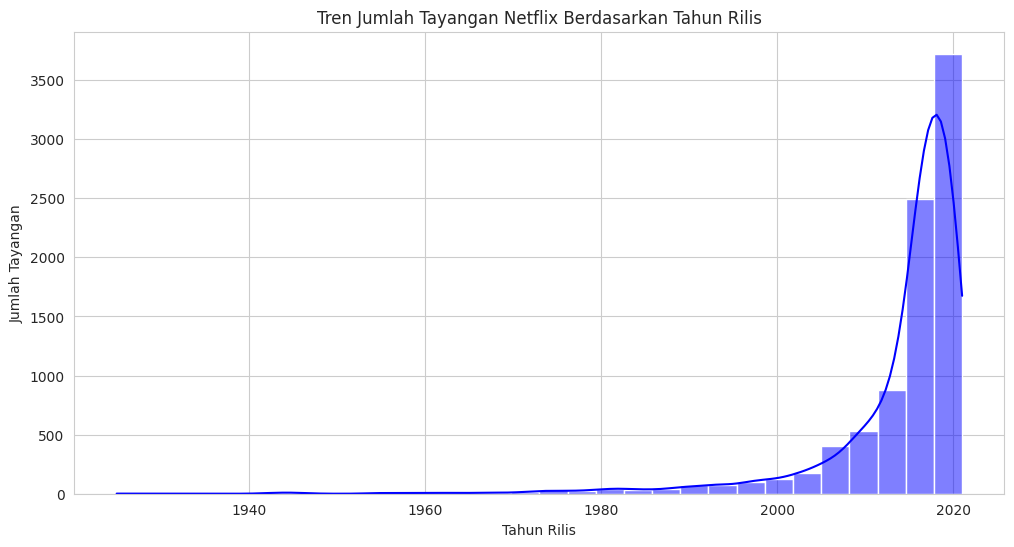

In [ ]:
# Mengatur gaya visualisasi
sns.set_style("whitegrid")

# 1. Tren jumlah tayangan berdasarkan tahun rilis
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'], bins=30, kde=True, color='blue')
plt.xlabel("Tahun Rilis")
plt.ylabel("Jumlah Tayangan")
plt.title("Tren Jumlah Tayangan Netflix Berdasarkan Tahun Rilis")
plt.show()


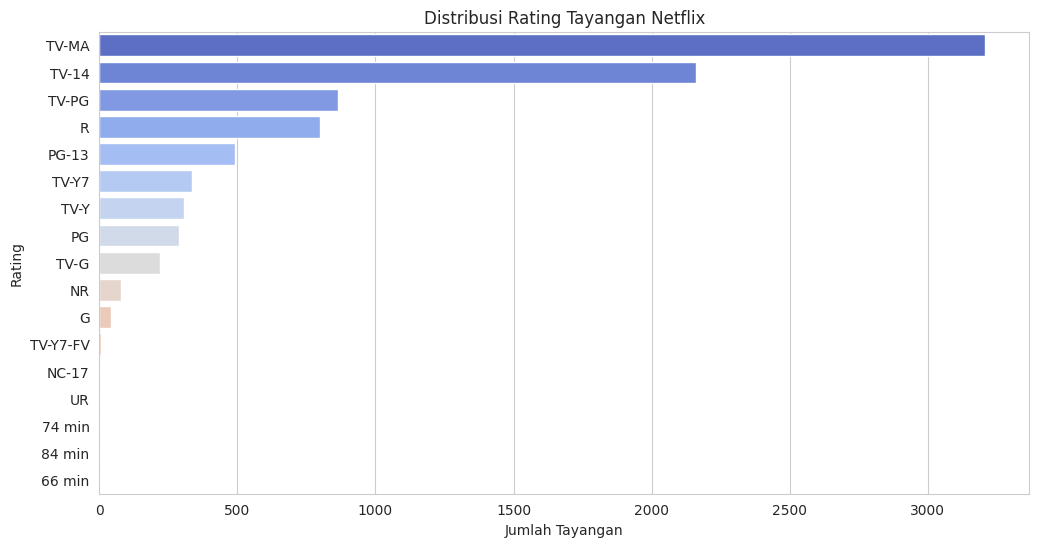

In [ ]:
# Mengatur gaya visualisasi
sns.set_style("whitegrid")

# 2. Distribusi rating
plt.figure(figsize=(12, 6))
sns.countplot(y=df['rating'], order=df['rating'].value_counts().index, palette="coolwarm")
plt.xlabel("Jumlah Tayangan")
plt.ylabel("Rating")
plt.title("Distribusi Rating Tayangan Netflix")
plt.show()

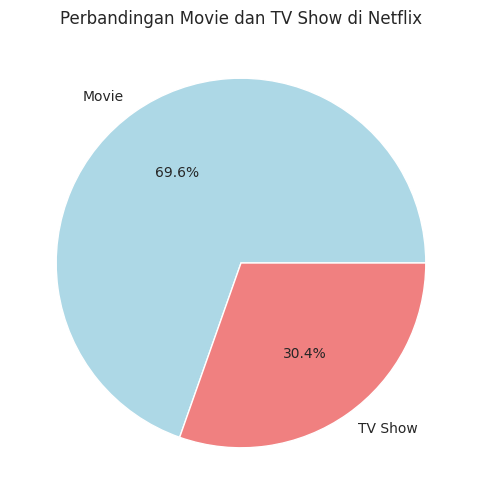

In [ ]:
# Mengatur gaya visualisasi
sns.set_style("whitegrid")

# 3. Perbandingan antara Movie dan TV Show
plt.figure(figsize=(6, 6))
df['type'].value_counts().plot.pie(autopct='%1.1f%%', colors=["lightblue", "lightcoral"])
plt.title("Perbandingan Movie dan TV Show di Netflix")
plt.ylabel("")
plt.show()

Deskripsi Dataset Netflix
Dataset ini berisi 8.807 baris dan 12 kolom dengan berbagai informasi tentang judul-judul di Netflix.

Kolom-kolom Dataset:
show_id: ID unik untuk setiap tayangan.

*   type: Jenis tayangan (Movie atau TV Show).
title: Judul tayangan.
*   country: Negara produksi. (Beberapa nilai hilang)
*   date_added: Tanggal tayangan ditambahkan ke Netflix.
*   director: Nama sutradara. (Banyak nilai yang hilang)
*   cast: Daftar pemeran. (Beberapa nilai hilang)
*   release_year: Tahun rilis tayangan.
*   rating: Klasifikasi usia.
*   duration: Durasi film atau jumlah musim untuk TV Show.
*   listed_in: Kategori tayangan.
*   description: Ringkasan singkat tentang tayangan.


Nilai yang Hilang:
* Kolom director memiliki banyak nilai kosong.
* Kolom cast dan country juga memiliki beberapa nilai yang hilang.
* Kolom date_added, rating, dan duration juga terdapat nilai yang hilang.

1.   Tren jumlah tayangan berdasarkan tahun rilis
      * Mayoritas tayangan di Netflix berasal dari tahun 2000 ke atas, dengan lonjakan signifikan setelah 2015.
      * Jumlah tayangan tertinggi dirilis sekitar 2018-2020.
2.   Distribusi rating
      * Rating TV-MA (untuk penonton dewasa) adalah yang paling umum.
      * Rating lain seperti TV-14 dan TV-PG juga cukup banyak ditemukan.
3.   Perbandingan antara Movie dan TV Show
      * Tayangan Netflix didominasi oleh Movie (~70%), sementara TV Show hanya sekitar 30%.





In [ ]:
#menghapus baris yang memiliki kolom kosong

# Pandas display options
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.7f}'.format

# Import library yang dibutuhkan
df = pd.read_csv("/content/sample_data/netflix.csv")

# Menghapus baris yang memiliki nilai kosong di kolom manapun
df_cleaned = df.dropna()

# Menampilkan informasi tentang DataFrame yang telah dibersihkan
print("Shape of original DataFrame:", df.shape)
print("Shape of cleaned DataFrame:", df_cleaned.shape)
print("Number of rows in original DataFrame:", df.shape[0])
print("Number of rows in cleaned DataFrame:", df_cleaned.shape[0])

# Display first 5 rows
df_cleaned.head()

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('cleaned.csv', index=False)
print("Dataframe saved to cleaned.csv")


Shape of original DataFrame: (8807, 12)
Shape of cleaned DataFrame: (5332, 12)
Number of rows in original DataFrame: 8807
Number of rows in cleaned DataFrame: 5332
Dataframe saved to cleaned.csv


#langkah selanjutnya Clustering

Jumlah kluster yang ditemukan: 4
Distribusi kluster: [ 103 2371  108 2750]


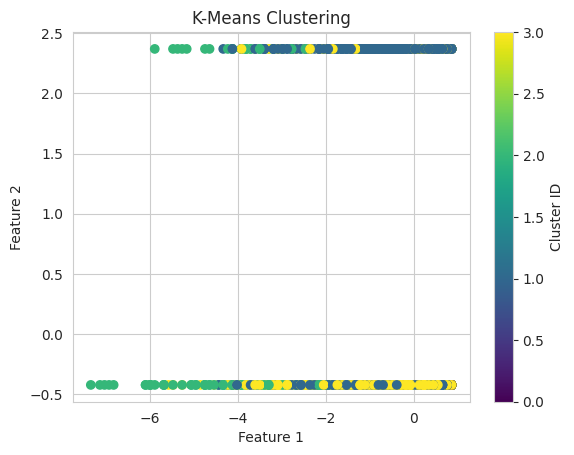

Dataframe dengan hasil clustering K-Means disimpan ke kmeans_clustered.csv


In [ ]:
# Gunakan K-Means dengan jumlah kluster yang optimal (misalnya K=4 jika itu titik Elbow terbaik)
optimal_k = 4  # Sesuaikan dengan hasil Elbow method

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_kmeans = kmeans.fit_predict(df_scaled)

# Tambahkan hasil kluster ke dalam dataframe
df_cleaned['KMeans_Cluster'] = clusters_kmeans

# Cek distribusi kluster
print(f"Jumlah kluster yang ditemukan: {len(np.unique(clusters_kmeans))}")
print(f"Distribusi kluster: {np.bincount(clusters_kmeans)}")

# Visualisasi hasil K-Means
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters_kmeans, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster ID')
plt.show()

# Simpan hasil clustering ke file CSV
df_cleaned.to_csv('kmeans_clustered.csv', index=False)
print("Dataframe dengan hasil clustering K-Means disimpan ke kmeans_clustered.csv")


Jumlah kluster yang ditemukan oleh DBSCAN: 113
Label kluster DBSCAN: [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111]
Jumlah noise (titik yang tidak masuk kluster): 685


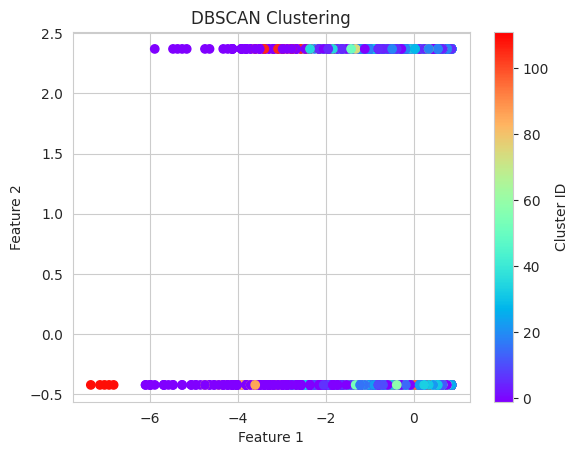

In [ ]:
import pandas as pd
import numpy as np

# Cek jumlah kluster yang ditemukan oleh DBSCAN
unique_clusters_dbscan = np.unique(clusters_dbscan)
print(f"Jumlah kluster yang ditemukan oleh DBSCAN: {len(unique_clusters_dbscan)}")
print(f"Label kluster DBSCAN: {unique_clusters_dbscan}")

# Cek jumlah titik yang merupakan noise (label -1)
num_noise = np.sum(clusters_dbscan == -1)
print(f"Jumlah noise (titik yang tidak masuk kluster): {num_noise}")

# Menambahkan hasil DBSCAN ke dataframe untuk visualisasi
df_cleaned['DBSCAN_Cluster'] = clusters_dbscan

# Visualisasi hasil DBSCAN
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters_dbscan, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster ID')
plt.show()


Jumlah kluster yang ditemukan oleh Hierarchical: 4
Label kluster Hierarchical: [0 1 2 3]


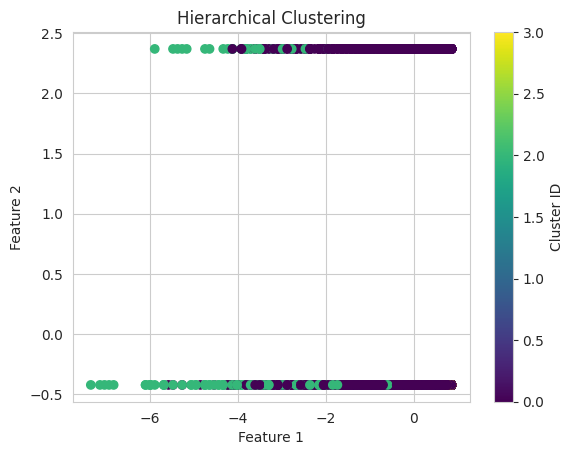

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering # Import the necessary library

# Assuming 'df_scaled' is your preprocessed data for clustering
# and you want 4 clusters
n_clusters = 4
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
clusters_hierarchical = hierarchical.fit_predict(df_scaled) # Assign cluster labels to 'clusters_hierarchical'


# Cek hasil clustering Hierarchical
unique_clusters_hierarchical = np.unique(clusters_hierarchical)
print(f"Jumlah kluster yang ditemukan oleh Hierarchical: {len(unique_clusters_hierarchical)}")
print(f"Label kluster Hierarchical: {unique_clusters_hierarchical}")

# Menambahkan hasil Hierarchical Clustering ke dataframe untuk visualisasi
df_cleaned['Hierarchical_Cluster'] = clusters_hierarchical

# Visualisasi hasil Hierarchical Clustering
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters_hierarchical, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster ID')
plt.show()

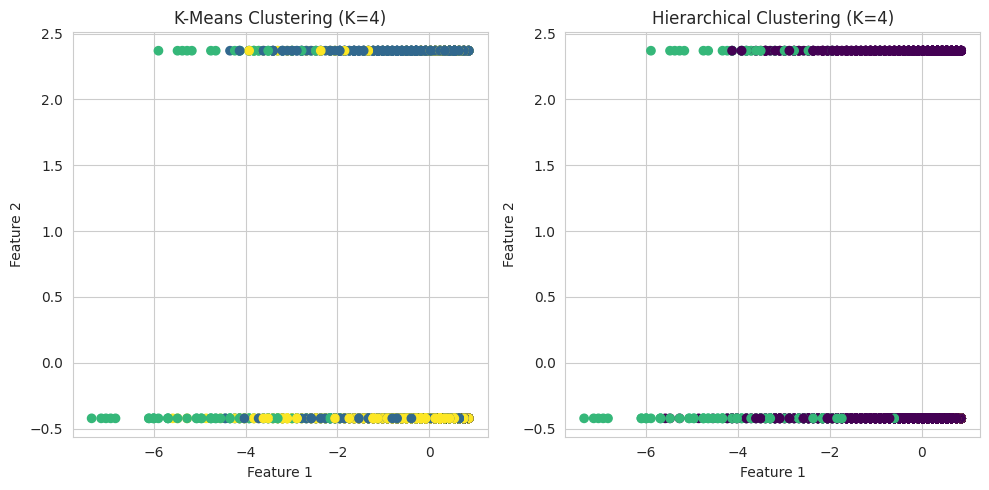

In [ ]:
# Visualisasi hasil K-Means
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters_kmeans, cmap='viridis')
plt.title('K-Means Clustering (K=4)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Visualisasi hasil Hierarchical Clustering
plt.subplot(1, 2, 2)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters_hierarchical, cmap='viridis')
plt.title('Hierarchical Clustering (K=4)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Silhouette Score untuk K-Means
silhouette_kmeans = silhouette_score(df_scaled, clusters_kmeans)
print(f"Silhouette Score K-Means: {silhouette_kmeans}")

# Silhouette Score untuk Hierarchical
silhouette_hierarchical = silhouette_score(df_scaled, clusters_hierarchical)
print(f"Silhouette Score Hierarchical: {silhouette_hierarchical}")


Silhouette Score K-Means: 0.12221104817496073
Silhouette Score Hierarchical: 0.420944638165022


In [ ]:
# Cek distribusi jumlah titik di setiap kluster untuk K-Means
print(f"Distribusi kluster K-Means: {np.bincount(clusters_kmeans)}")

# Cek distribusi jumlah titik di setiap kluster untuk Hierarchical
print(f"Distribusi kluster Hierarchical: {np.bincount(clusters_hierarchical)}")


Distribusi kluster K-Means: [ 103 2371  108 2750]
Distribusi kluster Hierarchical: [5027   44  163   98]


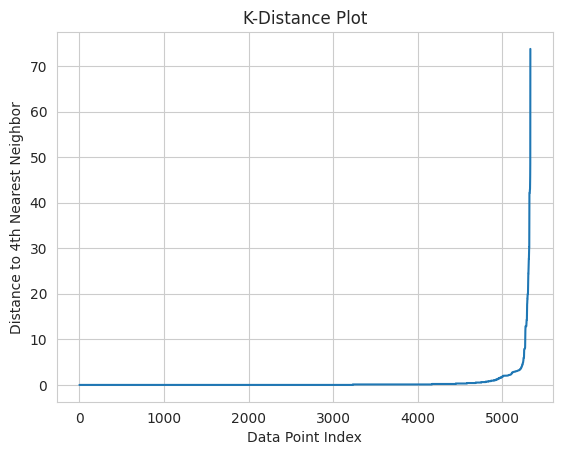

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Tentukan jumlah tetangga terdekat yang digunakan untuk K-Distance Plot
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

# Urutkan jarak dan plot untuk menemukan perubahan yang tajam
distances = np.sort(distances[:, 3], axis=0)
plt.plot(distances)
plt.title('K-Distance Plot')
plt.xlabel('Data Point Index')
plt.ylabel('Distance to 4th Nearest Neighbor')
plt.show()


Jumlah kluster yang ditemukan: 112 (tanpa noise)
Jumlah noise (titik yang tidak masuk kluster): 685


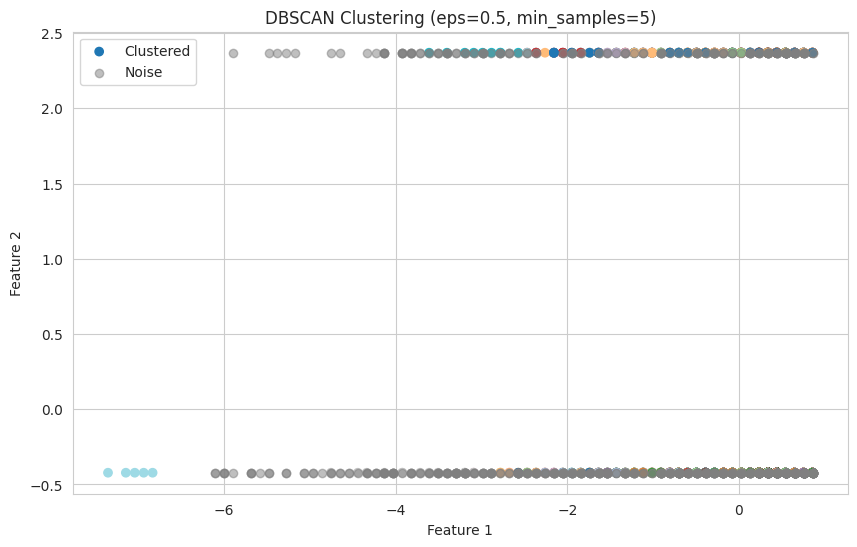

In [ ]:
from sklearn.cluster import DBSCAN

# Tentukan nilai eps dan min_samples
eps_value = 0.5  # Sesuaikan dengan hasil K-Distance plot
min_samples_value = 5  # Sesuaikan sesuai dengan kebutuhan

# Terapkan DBSCAN dengan parameter yang telah disesuaikan
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters_dbscan = dbscan.fit_predict(df_scaled)

# Cek jumlah kluster dan noise
unique_clusters = np.unique(clusters_dbscan)
print(f"Jumlah kluster yang ditemukan: {len(unique_clusters) - 1} (tanpa noise)")
print(f"Jumlah noise (titik yang tidak masuk kluster): {np.sum(clusters_dbscan == -1)}")

# Visualisasi hasil
plt.figure(figsize=(10, 6))

# Plot kluster
plt.scatter(df_scaled[clusters_dbscan != -1, 0], df_scaled[clusters_dbscan != -1, 1],
            c=clusters_dbscan[clusters_dbscan != -1], cmap='tab20', label="Clustered")

# Plot noise
plt.scatter(df_scaled[clusters_dbscan == -1, 0], df_scaled[clusters_dbscan == -1, 1],
            color='gray', label="Noise", alpha=0.5)

plt.title(f'DBSCAN Clustering (eps={eps_value}, min_samples={min_samples_value})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df_scaled, clusters_dbscan)
print(f"Silhouette Score untuk DBSCAN: {sil_score}")


Silhouette Score untuk DBSCAN: 0.5790601176627425


In [ ]:
# Simpan hasil kluster ke dalam dataframe
df_cleaned['dbscan_cluster'] = clusters_dbscan

# Simpan dataframe yang sudah berisi label kluster ke file CSV
df_cleaned.to_csv('dbscan_clustered.csv', index=False)

print("Hasil DBSCAN telah disimpan ke dbscan_clustered.csv")


Hasil DBSCAN telah disimpan ke dbscan_clustered.csv


1. K-Means:
Silhouette Score: 0.12, menunjukkan kluster yang kurang baik dengan tumpang tindih antar kluster yang signifikan.
Distribusi Kluster: Kluster sangat tidak seimbang, dengan dua kluster yang jauh lebih besar dari yang lain (2371 dan 2750 titik).
Masalah: K-Means cenderung membentuk kluster yang tidak terpisah dengan jelas dan tidak mampu menangani ketidakseimbangan data secara efektif.
2. Hierarchical Clustering:
Silhouette Score: 0.42, yang lebih baik daripada K-Means, menunjukkan kluster yang lebih terpisah dengan baik.
Distribusi Kluster: Masih ada ketidakseimbangan yang cukup ekstrem (satu kluster sangat besar dengan 5027 titik), tetapi hasilnya lebih baik daripada K-Means dalam hal pemisahan kluster.
Kelebihan: Memberikan hasil yang lebih terpisah dibandingkan K-Means, meskipun ada masalah dengan kluster besar dan kecil.
3. DBSCAN:
Jumlah Kluster: 113 kluster yang terbentuk dan 685 noise.
Keunggulan: DBSCAN dapat mengidentifikasi dan menangani noise (titik yang tidak dapat dikelompokkan ke dalam kluster), serta membentuk banyak kluster kecil yang lebih terisolasi.
Masalah: DBSCAN menghasilkan banyak kluster kecil (113), yang mungkin terlalu banyak jika dibandingkan dengan jumlah kluster yang ideal. Beberapa parameter (seperti eps dan min_samples) bisa disesuaikan untuk memperoleh hasil yang lebih stabil.


setelah perbaikan DBSCAN Dengan Silhouette Score DBSCAN yang mencapai 0.58, ini menunjukkan bahwa kluster yang terbentuk memiliki pemisahan yang cukup baik, dan model ini sudah lebih efektif dibandingkan dengan K-Means yang hanya mendapatkan 0.12. Nilai ini mengindikasikan bahwa DBSCAN mampu mengelompokkan data dengan lebih terpisah dan memberikan hasil yang lebih stabil, meskipun masih ada beberapa noise.

#Penggabungan dengan Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

# Baca data
df = pd.read_csv("/content/sample_data/dbscan_clustered.csv")

# Pisahkan kategori 'listed_in' menjadi list
df['listed_in'] = df['listed_in'].apply(lambda x: x.strip('[]').replace("'", "").split(', '))

# Gunakan MultiLabelBinarizer untuk mengubah kategori menjadi representasi numerik
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['listed_in'])

# Gabungkan fitur seperti release_year, duration, rating
df['duration'] = df['duration'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) else 0)
X = df[['release_year', 'duration']]  # Fitur: release_year dan duration
y = genre_encoded  # Target: genre yang sudah diencoding

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Klasifikasi
model = RandomForestClassifier(n_estimators=100, random_state=42)
multi_target_model = MultiOutputClassifier(model)

# Melatih model
multi_target_model.fit(X_train, y_train)

# Prediksi dan evaluasi model
y_pred = multi_target_model.predict(X_test)

# Evaluasi kinerja dengan menghitung akurasi per label
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.07310215557638237


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Membaca data
df = pd.read_csv("/content/sample_data/dbscan_clustered.csv")

# Menangani kolom 'duration' yang berisi teks seperti '9 Seasons'
def convert_duration(duration):
    # Mengabaikan 'Seasons' dan hanya mengambil angka
    if 'Season' in str(duration):
        return None  # Bisa diganti dengan nilai lain seperti 0 atau rata-rata jika perlu
    try:
        return float(duration.replace(' min', ''))
    except:
        return None

df['duration'] = df['duration'].apply(convert_duration)

# Proses kolom 'rating', 'country', 'director', dan 'cast' yang kategorikal
label_encoder = LabelEncoder()
df['rating'] = label_encoder.fit_transform(df['rating'].astype(str))
df['country'] = label_encoder.fit_transform(df['country'].astype(str))
df['director'] = label_encoder.fit_transform(df['director'].astype(str))
df['cast'] = label_encoder.fit_transform(df['cast'].astype(str))

# Menambahkan kolom DBSCAN_Cluster sebagai fitur
X = df[['release_year', 'duration', 'rating', 'country', 'director', 'cast']]

# Menentukan target y (genre atau kluster yang relevan)
y = df[['dbscan_cluster']]  # Gunakan dbscan_cluster sebagai target prediksi

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model dengan Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.23711340206185566


In [ ]:
# Import yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('/content/sample_data/dbscan_clustered.csv')

# Preprocessing data
# Cek apakah ada nilai 'Seasons' pada kolom 'duration' dan perbaiki data
df['duration'] = df['duration'].str.replace(' min', '', regex=False)
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

# Mengisi nilai kosong untuk durasi, jika ada, dengan rata-rata
df['duration'].fillna(df['duration'].mean(), inplace=True)

# Encoding kategori: rating dan country
df = pd.get_dummies(df, columns=['rating', 'country'], drop_first=True)

# Memilih fitur dan target
X = df[['release_year', 'duration'] + [col for col in df.columns if 'rating_' in col or 'country_' in col]]
y = df['dbscan_cluster']

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Inisialisasi GridSearchCV dengan RandomForest
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Latih model dengan grid search
grid_search.fit(X_train, y_train)

# Cek parameter terbaik
print(f"Best Parameters: {grid_search.best_params_}")

# Gunakan model terbaik
best_model = grid_search.best_estimator_

# Prediksi dan evaluasi model
y_pred = best_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix dan Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.2408622305529522
Confusion Matrix:
[[90  0  6 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [13  0 21 ...  0  0  0]
 ...
 [ 2  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.24      0.72      0.36       125
           0       0.00      0.00      0.00         2
           1       0.12      0.32      0.18        66
           2       0.23      0.18      0.20        17
           3       0.12      0.07      0.09        14
           4       0.00      0.00      0.00        10
           5       0.33      0.27      0.30        26
           6       0.00      0.00      0.00        20
           7       1.00      0.75      0.86         8
           8       0.00      0.00      0.00         4
           9  

In [ ]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('/content/sample_data/dbscan_clustered.csv')

# Pembersihan data: Menghapus semua teks selain angka dan titik desimal
df['duration'] = df['duration'].str.replace(r'[^0-9.]', '', regex=True)

# Mengubah nilai ke tipe data float
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

# Mengisi NaN dengan rata-rata atau median
df['duration'].fillna(df['duration'].mean(), inplace=True)

# Cek hasil
print(df['duration'].head())


0    125
1      9
2    104
3    127
4    166
Name: duration, dtype: int64


In [ ]:
# Memilih fitur dan target
X = df[['release_year', 'duration'] + [col for col in df.columns if 'rating_' in col or 'country_' in col]]
y = df['dbscan_cluster']

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model dengan RandomForest
model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
model.fit(X_train, y_train)

# Prediksi dan evaluasi model
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.23055295220243674

Classification Report:
              precision    recall  f1-score   support

          -1       0.27      0.64      0.38       125
           0       0.00      0.00      0.00         2
           1       0.13      0.32      0.18        66
           2       0.07      0.06      0.06        17
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        10
           5       0.20      0.12      0.15        26
           6       0.00      0.00      0.00        20
           7       0.83      0.62      0.71         8
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         3
          10       0.37      0.58      0.45        33
          11       0.14      0.10      0.12        10
          12       0.00      0.00      0.00         4
          13       0.14      0.10      0.12        10
          14       0.06      0.05      0.05        20
          15       0.25    

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter


# Menyeimbangkan data dengan mengurangi jumlah tetangga lebih jauh
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Memeriksa distribusi kelas setelah SMOTE
print("Distribusi kelas setelah SMOTE:", Counter(y_resampled))

# Melatih model dengan data yang sudah diseimbangkan
model.fit(X_resampled, y_resampled)


Distribusi kelas setelah SMOTE: Counter({15: 560, 31: 560, 22: 560, 11: 560, 32: 560, -1: 560, 43: 560, 16: 560, 69: 560, 23: 560, 14: 560, 63: 560, 40: 560, 17: 560, 108: 560, 5: 560, 66: 560, 102: 560, 35: 560, 55: 560, 59: 560, 6: 560, 26: 560, 10: 560, 27: 560, 37: 560, 46: 560, 34: 560, 44: 560, 41: 560, 48: 560, 2: 560, 84: 560, 33: 560, 58: 560, 1: 560, 19: 560, 36: 560, 12: 560, 18: 560, 110: 560, 73: 560, 86: 560, 89: 560, 65: 560, 13: 560, 87: 560, 28: 560, 7: 560, 105: 560, 68: 560, 20: 560, 56: 560, 45: 560, 49: 560, 92: 560, 9: 560, 71: 560, 80: 560, 62: 560, 38: 560, 21: 560, 60: 560, 24: 560, 100: 560, 70: 560, 94: 560, 3: 560, 30: 560, 51: 560, 50: 560, 53: 560, 54: 560, 25: 560, 8: 560, 4: 560, 97: 560, 90: 560, 52: 560, 42: 560, 29: 560, 109: 560, 99: 560, 91: 560, 101: 560, 57: 560, 61: 560, 75: 560, 96: 560, 47: 560, 0: 560, 77: 560, 79: 560, 93: 560, 83: 560, 104: 560, 67: 560, 111: 560, 72: 560, 107: 560, 95: 560, 82: 560, 76: 560, 64: 560, 39: 560, 88: 560, 81: 5

RandomForestClassifier(max_depth=20, random_state=42)

Confusion Matrix:
[[46  0  5 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  4 ...  0  0  1]
 ...
 [ 1  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


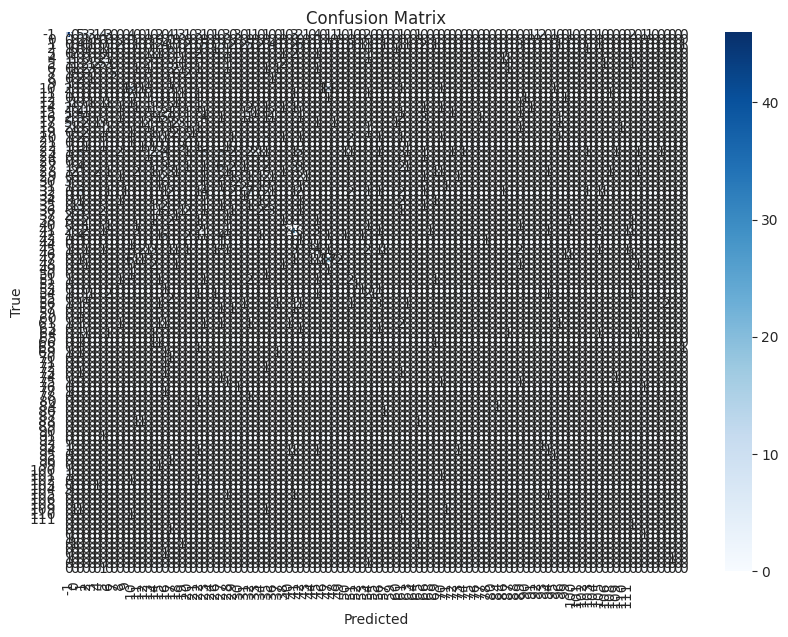


Classification Report:
              precision    recall  f1-score   support

          -1       0.47      0.37      0.41       125
           0       0.00      0.00      0.00         2
           1       0.06      0.06      0.06        66
           2       0.04      0.06      0.05        17
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        10
           5       0.19      0.19      0.19        26
           6       0.00      0.00      0.00        20
           7       1.00      0.62      0.77         8
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         3
          10       0.38      0.36      0.37        33
          11       0.08      0.10      0.09        10
          12       0.00      0.00      0.00         4
          13       0.07      0.10      0.08        10
          14       0.05      0.05      0.05        20
          15       0.10      0.08      0.09        25
   

In [ ]:
# Import library yang diperlukan
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Contoh model, bisa diganti dengan model lain
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import numpy as np

# Asumsi X dan y adalah data fitur dan label yang sudah ada sebelumnya
# Misalnya, X adalah fitur dan y adalah target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Misalnya, Anda hanya ingin menerapkan SMOTE pada kelas minoritas
smote = SMOTE(random_state=42, k_neighbors=1)  # Kurangi k_neighbors jika perlu
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Melatih model pada data latih yang sudah seimbang
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Mengevaluasi performa model
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report untuk melihat precision, recall, dan f1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Menghitung accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Hasil confusion matrix dan classification report menunjukkan bahwa model Anda memiliki kinerja yang kurang baik, dengan nilai accuracy sebesar sekitar 0.18 atau 18%. Beberapa hal yang dapat Anda perhatikan dan lakukan untuk meningkatkan model ini:

#Evaluasi dan Pengoptimalan

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Tentukan parameter yang ingin disetel
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Inisialisasi model RandomForest
rf = RandomForestClassifier(random_state=42)

# GridSearchCV untuk menemukan kombinasi hyperparameter terbaik
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Melatih model dengan GridSearchCV
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Tentukan parameter yang ingin disetel
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Inisialisasi model SVC
svc = SVC(random_state=42)

# GridSearchCV untuk menemukan kombinasi hyperparameter terbaik
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Melatih model dengan GridSearchCV
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Tentukan parameter yang ingin disetel dengan distribusi acak
param_dist = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Inisialisasi model RandomForest
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV untuk menemukan kombinasi hyperparameter terbaik
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Melatih model dengan RandomizedSearchCV
random_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)
